In [9]:
from analemma import orbit, plot as ap
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi
earth = orbit.PlanetParameters.earth()

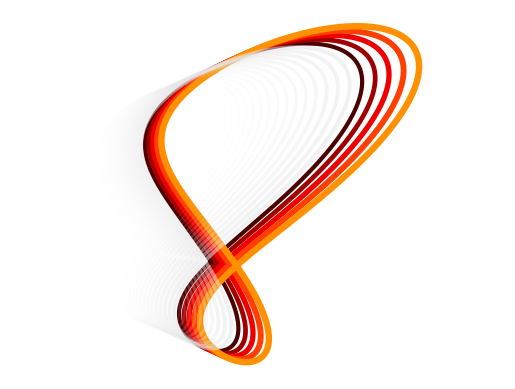

In [10]:
fig, ax = plt.subplots()
ax.axis("equal")

latitude_degrees = 0.1
thedial = ap.DialParameters(theta=(90 - latitude_degrees) / 180 * pi, iota=0, i=0, d=0)

def _hour_offset(mins: float) -> float:
    return 5.1 + mins / 60

min_mins = 0
max_mins = 5

def _linear(val: float, lower, upper, left, right) -> float:
    "Stay away from the edges of the colormap"
    frac = (val - lower) / (upper - lower)
    return left + frac * (right - left)

# main set of analemmas with nice colors
cmap = plt.get_cmap("hot")
for mins in np.arange(min_mins, max_mins):
    line_width = _linear(mins, min_mins, max_mins, 3, 5)
    ap.plot_analemma(
        ax,
        hour_offset=_hour_offset(mins),
        planet=earth,
        dial=thedial,
        linewidth=line_width,
        color=cmap(_linear(mins, min_mins, max_mins, 0.1, 0.7)),
    )

def _quad(val: float, lower, upper, left, right) -> float:
    scale = (right-left)/(upper-lower)**2
    return scale*(val-lower)**2 + left

grey_level = 0.9

# fade in from the left
lower = -3*max_mins
upper = min_mins
for mins in np.arange(lower, upper):
    alpha = _quad(mins, lower, upper, 0.05, 0.6)
    line_width = _linear(mins, lower, upper, 1, 3)
    ap.plot_analemma(
        ax,
        hour_offset=_hour_offset(mins),
        planet=earth,
        dial=thedial,
        linewidth=line_width,
        color=[grey_level]*3 + [alpha],
    )


_ = plt.axis("off")

plt.savefig("analemma_logo.svg", transparent=True)